<a href="https://colab.research.google.com/github/Tanulshn/Zero-to-One-Valuation/blob/main/Valuation_0_1_individual_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective 
To derive an alternative notation for the valuation (either PE or PB) of individual stocks to be compared with one another.



# Package Imported

For pandas, numpy and visualisation
- import pandas as pd
- import numpy as np
- import seaborn as sns
- import matplotlib.pyplot as plt
- import pylab
- %matplotlib inline
- plt.style.use('seaborn-darkgrid')

For Standardisation
- from sklearn.preprocessing import StandardScaler


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# For q-q plot
import scipy.stats
import pylab

plt.style.use('seaborn-darkgrid')

import glob

import warnings
warnings.simplefilter(action='ignore')

In [5]:
#data_std= pd.DataFrame()

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0-1: Valuation/CSV Files/KRBL.csv')
#Convert the datatype from object to float
for i in ['Value','Mcap']:
  df[i] = pd.to_numeric(df[i], errors= 'coerce').round(2)

df = df[['Date','Value','Mcap']]
df['Date'] = pd.to_datetime(df['Date'], dayfirst=False) # Use dayfirst function carefully
df.set_index('Date', inplace=True) # Set the Date Column to Index
df = df.resample('m').last() # Set the frequency to Business days
#df.fillna(method='ffill') # Fill the nan values

df.head(20)



,Value,Mcap
Date,,
2010-02-28,7.32,619.0
2010-03-31,5.40,580.0
2010-04-30,6.34,679.0
2010-05-31,5.40,581.0
2010-06-30,5.69,569.0
2010-07-31,5.74,571.0
2010-08-31,5.70,569.0
2010-09-30,8.12,874.0
2010-10-31,11.11,1200.0


In [6]:
df.tail(20)

,Value,Mcap
Date,,
2020-01-31,11.41,6219.0
2020-02-29,10.77,5901.0
2020-03-31,5.67,3208.0
2020-04-30,8.07,4510.0
2020-05-31,7.88,4410.0
2020-06-30,10.55,5779.0
2020-07-31,11.60,6368.0
2020-08-31,11.23,6172.0
2020-09-30,11.66,6824.0


### Data PreProcessing 

In [7]:
df.shape

(139, 2)

In [8]:
df.tail()

,Value,Mcap
Date,,
2021-04-30,7.76,4352.0
2021-05-31,8.83,4949.0
2021-06-30,9.89,5546.0
2021-07-31,11.50,6512.0
2021-08-31,11.77,NaN


In [9]:
# Check for null values
df.isnull().sum()

Value    0
Mcap     1
dtype: int64

The dataframes are ready to be used for further procesing
# Variable transformation

## For Standalone variables

In [10]:
  # Import packages
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [28]:
# Create a function for transformation
def scale(series, monthly=False):
  """ Returns a Standardised series based on the Standard scale
  Monthly - Whether to perform on monthly data or daily data
  """

  if monthly:
    if len(series)>84:
      #print('No of months available is {}. Hence, the scale function can be applied.'.format(len(series)))
      norm = sc.fit(series[-84:])
      scaled_values = norm.transform(series)
    else:
      print('No of months available is {}. The scale function can not be applied.'.format(len(series)))

 
  else:
    if len(series)>1750:
      print('No of days available is {}. Hence, the scale function can be applied.'.format(len(series)))
      sc.fit_transform(series[-1750:])
      scaled_values = sc.transform(series)
    else:
      print('No of days available is {}. The scale function can not be applied.'.format(len(series)))

  
  return scaled_values


In [12]:
df.tail()


,Value,Mcap
Date,,
2021-04-30,7.76,4352.0
2021-05-31,8.83,4949.0
2021-06-30,9.89,5546.0
2021-07-31,11.50,6512.0
2021-08-31,11.77,NaN


### Scaled Valuations: As of today

In [13]:
Scaled_std_2021 = df.copy()
Scaled_std_2021['Value'] = scale(df[['Value']],monthly = True).round(3)

Scaled_std_2021.tail()
  

,Value,Mcap
Date,,
2021-04-30,-1.261,4352.0
2021-05-31,-1.098,4949.0
2021-06-30,-0.936,5546.0
2021-07-31,-0.690,6512.0
2021-08-31,-0.649,NaN


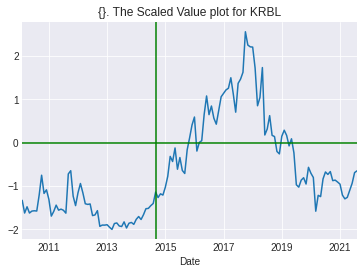

In [14]:
Scaled_std_2021['Value'].plot()
plt.axvline(x = Scaled_std_2021.index[-84], color='g')
plt.axhline(y =0, color='g')
plt.title('{}. The Scaled Value plot for KRBL')
plt.show()

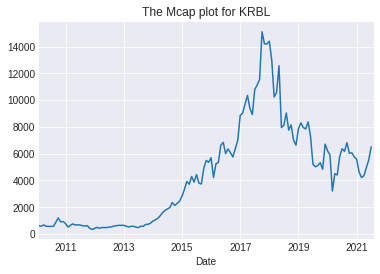

In [15]:
Scaled_std_2021['Mcap'].plot()
#plt.axvline(x = Scaled_std_2021.index[-84], color='g')
#plt.axhline(y =0, color='g')
plt.title('The Mcap plot for KRBL')
plt.show()

### As per custom month
Custom Selection for deriving Valuation equivalence at a certain point.

- Pass a snippet of the main series as arguement. (Starting from the beginning and ending at a dersired month/date)
- pass scale to determine if the past 7 years data can be figured out or not
- Save the output as a seperate dataframe. and join it with the original df with timestamp as reference.
 

Although I am creating these functions for manual operation, we will have to consider automating the same in the future.

In [16]:
df_m = Scaled_std_2021.copy()

In [17]:
df_m

,Value,Mcap
Date,,
2010-02-28,-1.329,619.0
2010-03-31,-1.622,580.0
2010-04-30,-1.478,679.0
2010-05-31,-1.622,581.0
2010-06-30,-1.577,569.0
...,...,...
2021-04-30,-1.261,4352.0
2021-05-31,-1.098,4949.0
2021-06-30,-0.936,5546.0


In [18]:
# Pass the end date for reference (format yyyy-mm)
V_2018 = scale(df_m[['Value']][:'2018-12'], monthly=True).round(3)
V_2018 = pd.DataFrame(V_2018, index = df_m[['Value']][:'2018-12'].index , columns= ['Scaled_2018'])
V_2018.tail()


,Scaled_2018
Date,
2018-08-31,0.754
2018-09-30,0.403
2018-10-31,0.382
2018-11-30,0.117
2018-12-31,0.074


In [19]:
V_2019 = scale(df_m[['Value']][:'2019-12'], monthly=True).round(3)
V_2019 = pd.DataFrame(V_2019, index = df_m[['Value']][:'2019-12'].index , columns= ['Scaled_2019'])
V_2019.tail()

,Scaled_2019
Date,
2019-08-31,-0.680
2019-09-30,-0.548
2019-10-31,-0.503
2019-11-30,-0.621
2019-12-31,-0.306


In [20]:
V_2020 = scale(df_m[['Value']][:'2020-12'], monthly=True).round(3)
V_2020 = pd.DataFrame(V_2020, index = df_m[['Value']][:'2020-12'].index , columns= ['Scaled_2020'])
V_2020.tail()

,Scaled_2020
Date,
2020-08-31,-0.633
2020-09-30,-0.572
2020-10-31,-0.767
2020-11-30,-0.756
2020-12-31,-0.797


In [21]:
V_2014 = scale(df_m[['Value']][:'2014-12'], monthly=True).round(3)
V_2014 = pd.DataFrame(V_2014, index = df_m[['Value']][:'2014-12'].index , columns= ['Scaled_2014'])
V_2014.tail()

No of months available is 59. The scale function can not be applied.


UnboundLocalError: ignored

In [22]:
V_2010 = scale(df_m[['Value']][:'2010-12'], monthly=True).round(3)
V_2010 = pd.DataFrame(V_2010, index = df_m[['Value']][:'2010-12'].index , columns= ['Scaled_2010'])
V_2010.tail()

No of months available is 11. The scale function can not be applied.


UnboundLocalError: ignored

In [ ]:
V_2008 = scale(df_m[['Value']][:'2008-12'], monthly=True).round(3)
V_2008 = pd.DataFrame(V_2008, index = df_m[['Value']][:'2008-12'].index , columns= ['Scaled_2008'])
V_2008.tail()

In [29]:
V_2017 = scale(df_m[['Value']][:'2017-12'], monthly=True).round(3)
V_2017 = pd.DataFrame(V_2017, index = df_m[['Value']][:'2017-12'].index , columns= ['Scaled_2017'])
V_2017.tail()

,Scaled_2017
Date,
2017-08-31,1.723
2017-09-30,1.852
2017-10-31,2.613
2017-11-30,2.363
2017-12-31,2.330


In [33]:
df_M_combined = df_m.join(V_2017, how= 'outer').join(V_2018, how= 'outer').join(V_2019, how= 'outer').join(V_2020, how= 'outer')

In [34]:
df_M_combined.tail(50)

,Value,Mcap,Scaled_2017,Scaled_2018,Scaled_2019,Scaled_2020
Date,,,,,,
2017-07-31,1.369,10788.0,1.644,1.328,1.282,1.335
2017-08-31,1.466,11137.0,1.723,1.403,1.362,1.426
2017-09-30,1.624,11533.0,1.852,1.525,1.491,1.574
2017-10-31,2.559,15107.0,2.613,2.245,2.258,2.450
2017-11-30,2.252,14209.0,2.363,2.009,2.006,2.162
2017-12-31,2.211,14183.0,2.330,1.977,1.973,2.124
2018-01-31,2.205,14404.0,NaN,1.972,1.968,2.118
2018-02-28,1.722,13002.0,NaN,1.600,1.572,1.666
2018-03-31,0.852,10234.0,NaN,0.929,0.858,0.851


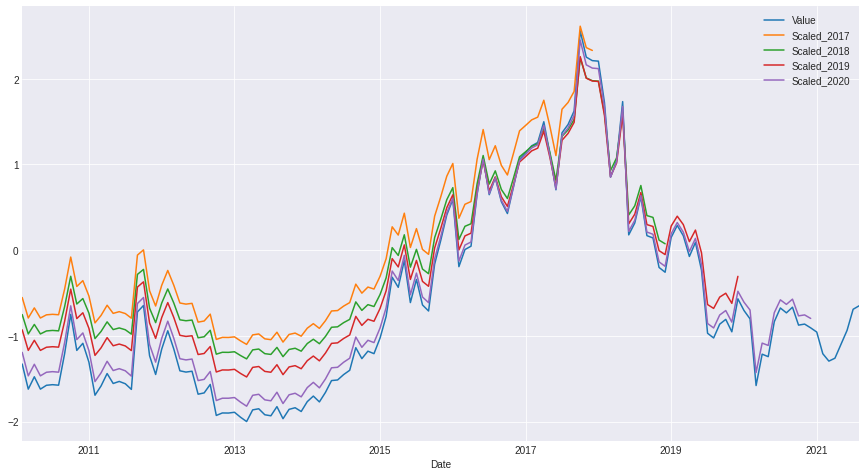

In [37]:
plt.figure(figsize=(15,8))
df_M_combined['Value'].plot()
#df_M_combined['Scaled_2010'].plot()
#df_M_combined['Scaled_2014'].plot()
df_M_combined['Scaled_2017'].plot()
df_M_combined['Scaled_2018'].plot()
df_M_combined['Scaled_2019'].plot()
df_M_combined['Scaled_2020'].plot()

plt.legend()
plt.show()


In [ ]:
df_M_combined['S_value']['2015-12':].plot()
#df_M_combined['Scaled_2014'].plot()

In [ ]:
df_M_combined['Scaled_2014'].plot()

## Include correlation with MCap too.


In [39]:
df_m.corr()

,Value,Mcap
Value,1.000000,0.918685
Mcap,0.918685,1.000000
